# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [47]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# Create two new dataframes
North_CallCenter= pd.read_csv(r"C:\Users\ganes\Desktop\LaunchCode\data-analysis-projects\call-center-cleanup-assignment\NorthCallCenter.csv")
South_CallCenter= pd.read_csv(r"C:\Users\ganes\Desktop\LaunchCode\data-analysis-projects\call-center-cleanup-assignment\SouthCallCenter.csv")


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [34]:
# EDA Question 1A solution below:

north_reps = North_CallCenter[North_CallCenter['Branch'] == 'North']['Rep ID'].nunique()
print(f"Number of unique reps in the North branch: {north_reps}")

Number of unique reps in the North branch: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [35]:
# EDA Question 1B solution Below:

south_reps = South_CallCenter[South_CallCenter['Branch'] == 'South']['Rep ID'].nunique()
print(f"Number of unique reps in the South branch: {south_reps}")
#South_CallCenter = South_CallCenter[South_CallCenter['Branch'] == 'South']['Rep ID'].nunique()
#print(f"Number of unique reps in the South branch: {south_reps}")

Number of unique reps in the South branch: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [36]:
# EDA Question 2A solution Below:
north_branch = North_CallCenter[North_CallCenter['Branch'] == 'North']

avg_busy_minutes = north_branch['Busy Minutes'].mean()
avg_not_ready_minutes = north_branch['Not Ready Minutes'].mean()
avg_incoming_wait_time = north_branch['Incoming Wait Time'].mean()
avg_during_call_wait_time = north_branch['During Call Wait Time'].mean()

print(f"Average Busy Minutes (North): {avg_busy_minutes}")
print(f"Average Not Ready Minutes (North): {avg_not_ready_minutes}")
print(f"Average Incoming Wait Time (North): {avg_incoming_wait_time}")
print(f"Average During Call Wait Time (North): {avg_during_call_wait_time}")

Average Busy Minutes (North): 9.987755102040817
Average Not Ready Minutes (North): 1.9142857142857144
Average Incoming Wait Time (North): 3.048780487804878
Average During Call Wait Time (North): 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [37]:
# EDA Question 2B solution Below:
south_branch = South_CallCenter[South_CallCenter['Branch'] == 'South']

avg_busy_minutes = south_branch['Busy Minutes'].mean()
avg_not_ready_minutes = south_branch['Not Ready Minutes'].mean()
avg_incoming_wait_time = south_branch['Incoming Wait Time'].mean()
avg_during_call_wait_time = south_branch['During Call Wait Time'].mean()

print(f"Average Busy Minutes: {avg_busy_minutes}")
print(f"Average Not Ready Minutes: {avg_not_ready_minutes}")
print(f"Average Incoming Wait Time: {avg_incoming_wait_time}")
print(f"Average During Call Wait Time: {avg_during_call_wait_time}")


Average Busy Minutes: 10.054140127388536
Average Not Ready Minutes: 1.910828025477707
Average Incoming Wait Time: 3.0
Average During Call Wait Time: 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [38]:
# EDA Question 3 solution Below:
combined_callcenter = pd.concat([North_CallCenter, South_CallCenter])
calls_per_timeblock = combined_callcenter.groupby('Time Block')['Calls'].sum()
print(calls_per_timeblock)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [39]:
# Question 1 solution below
#To find missing data in both datasets following steps are carried out

for col in North_CallCenter.columns:
    pct_missing = np.mean(North_CallCenter[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

for col in South_CallCenter.columns:
    pct_missing = np.mean(South_CallCenter[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: In both the datasets data is missing in only one column.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [40]:
# Cleaning Question 2 solution below:
North_CallCenter['Sale'] = North_CallCenter['Sale'].str.strip()
North_CallCenter['Sale'].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: I checked for the unique values in the "Sale" column to investigate the issue with the two separate "YES" values.
> The issue is that there are two separate "YES" values in the "Sale" column: one with an extra trailing space ('YES ') and one without it ('YES'). This inconsistency can be resolved by cleaning the column and standardizing the values.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [41]:
# Cleaning Question 3 solution below:
# Merge the datasets based on common columns (e.g., 'Rep ID' and 'Call Purpose')
merged_df = pd.merge(North_CallCenter, South_CallCenter, on=['Rep ID', 'Call Purpose'], how='inner')
duplicates = merged_df.duplicated(subset=['Rep ID', 'Call Purpose'])
print(duplicates)

# Drop duplicates
cleaned_df = merged_df.drop_duplicates(subset=['Rep ID', 'Call Purpose'])


Series([], dtype: bool)


##### Record your answer below:
> Your Answer: I'll identify duplicates based on one or more key columns (e.g., Rep ID, Call Purpose, Sale, etc.).
> we can either drop or flag the duplicates:

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [42]:
# Cleaning Question 4 solution below:
#1. Check for Missing Data:
north_missing = North_CallCenter.isnull().sum()
south_missing = South_CallCenter.isnull().sum()

print(north_missing)
print(south_missing)

North_CallCenter['Incoming Wait Time'] = North_CallCenter['Incoming Wait Time'].fillna(North_CallCenter['Incoming Wait Time'].mean())
South_CallCenter['Incoming Wait Time'] = South_CallCenter['Incoming Wait Time'].fillna(South_CallCenter['Incoming Wait Time'].mean())

print(north_missing)
print(south_missing)

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block       

##### Record your answer below:
> Your Answer: Yes, there are missing values in the column "Incoming Wait Time".
> I filled the values by using 'mean' method.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [43]:
# Create dataframe for the entire company named df
#If both datasets have the same structure (i.e., same columns), we can concatenate them row-wise. In this case both df have same structure,therefore we can use 'cocat' to combine the two datasets.

df = pd.concat([North_CallCenter, South_CallCenter], ignore_index=True)
print(df.head())

   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [44]:
# Manipulation Question solution below:
rep_group = df.groupby(['Rep ID', 'Branch']).sum()

sorted_rep_group = rep_group.sort_values(by='Calls', ascending=False)

top_reps = sorted_rep_group.groupby('Branch').head(1)

print(top_reps)

               Unnamed: 0                                       Call Purpose  \
Rep ID Branch                                                                  
Brent  North         4840  ComplaintSales SupportProduct SupportComplaint...   
Eric   South         5039  Sales SupportComplaintSales SupportSales Suppo...   

                                                      Time Block  \
Rep ID Branch                                                      
Brent  North   9:00 AM4:00 PM12:00 PM12:00 PM3:00 PM1:00 PM10...   
Eric   South   10:00 AM1:00 PM10:00 AM12:00 PM2:00 PM3:00 PM3...   

                                            Incoming or Outgoing  \
Rep ID Branch                                                      
Brent  North   IncomingIncomingIncomingIncomingIncomingIncomi...   
Eric   South   IncomingIncomingIncomingIncomingIncomingIncomi...   

                                               Queue  \
Rep ID Branch                                          
Brent  North   BBBBBB

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Rep ID: Brent, Calls: 37
- South Branch = Rep ID: Eric, Calls: 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [45]:
# Manipulation Question 2 solution below:
#Total_calls=df['Calls'].sum()

branch_abandonment = df.groupby('Branch').apply(
    lambda x: (x['Abandoned'].sum() / x['Calls'].sum()) * 100,include_groups=False)

total_abandonment_rate = (df['Abandoned'].sum() / df['Calls'].sum()) * 100

print("Abandonment Rate per Branch:")
print(branch_abandonment)

print(f"\nOverall Company Abandonment Rate: {total_abandonment_rate:.2f}%")

#Do any of these fall out of the optimal range of 2-5%?

optimal_range = (2, 5)
out_of_range_branches = branch_abandonment[(branch_abandonment < 2) | (branch_abandonment > 5)]

print("Branches with Abandonment Rate outside the optimal range of 2-5%:")
print(out_of_range_branches)

Abandonment Rate per Branch:
Branch
North    2.857143
South    1.273885
dtype: float64

Overall Company Abandonment Rate: 1.97%
Branches with Abandonment Rate outside the optimal range of 2-5%:
Branch
South    1.273885
dtype: float64


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.857143
- South Branch = 1.273885
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [49]:
# Manipulation Question 3 solution below:
# Step 1: Filter incoming calls that are answered within 2 seconds
north_quick_calls = North_CallCenter[(North_CallCenter["Incoming Wait Time"] <= 2.0) & (North_CallCenter["Incoming or Outgoing"] == "Incoming")]
south_quick_calls = South_CallCenter[(South_CallCenter["Incoming Wait Time"] <= 2.0) & (South_CallCenter["Incoming or Outgoing"] == "Incoming")]

# Step 2: Total calls for each branch
north_total_calls = North_CallCenter[North_CallCenter["Incoming or Outgoing"] == "Incoming"]["Calls"].sum()
south_total_calls = South_CallCenter[South_CallCenter["Incoming or Outgoing"] == "Incoming"]["Calls"].sum()

# Step 3: Calls answered within 2 seconds
north_quick_total = north_quick_calls["Calls"].sum()
south_quick_total = south_quick_calls["Calls"].sum()

# Step 4: Calculate service level percentages
north_service_level = (north_quick_total / north_total_calls) * 100
south_service_level = (south_quick_total / south_total_calls) * 100

# Step 5: Company-wide service level percentage
total_calls_company = north_total_calls + south_total_calls
quick_calls_company = north_quick_total + south_quick_total
company_service_level = (quick_calls_company / total_calls_company) * 100

# Print results
print(f"North Branch Service Level: {north_service_level:.2f}%")
print(f"South Branch Service Level: {south_service_level:.2f}%")
print(f"Company-wide Service Level: {company_service_level:.2f}%")


North Branch Service Level: 40.24%
South Branch Service Level: 38.10%
Company-wide Service Level: 38.94%


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 calls
- South Branch = 38.10% and 48 calls
- Company Wide = 38.94% and 81 calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [50]:
# Manipulation Question 4 solution below:
# Step 1: Filter incoming calls for both branches
north_incoming_calls = North_CallCenter[North_CallCenter["Incoming or Outgoing"] == "Incoming"]
south_incoming_calls = South_CallCenter[South_CallCenter["Incoming or Outgoing"] == "Incoming"]

# Step 2: Calculate the average speed of answer (ASA) for each branch
north_avg_speed_answer = north_incoming_calls["Incoming Wait Time"].mean()
south_avg_speed_answer = south_incoming_calls["Incoming Wait Time"].mean()

# Step 3: Calculate the company-wide average speed of answer
# Combine both branches to get the overall average
combined_incoming_calls = pd.concat([north_incoming_calls, south_incoming_calls])
company_avg_speed_answer = combined_incoming_calls["Incoming Wait Time"].mean()

# Print results
print(f"North Branch Average Speed of Answer: {north_avg_speed_answer:.2f} seconds")
print(f"South Branch Average Speed of Answer: {south_avg_speed_answer:.2f} seconds")
print(f"Company-wide Average Speed of Answer: {company_avg_speed_answer:.2f} seconds")


North Branch Average Speed of Answer: 3.05 seconds
South Branch Average Speed of Answer: 3.00 seconds
Company-wide Average Speed of Answer: 3.02 seconds


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3 seconds
- Company Wide in seconds = 3.02 seconds


## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\ganes\AppData\Local\Temp\ipykernel_12344\3796147387.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


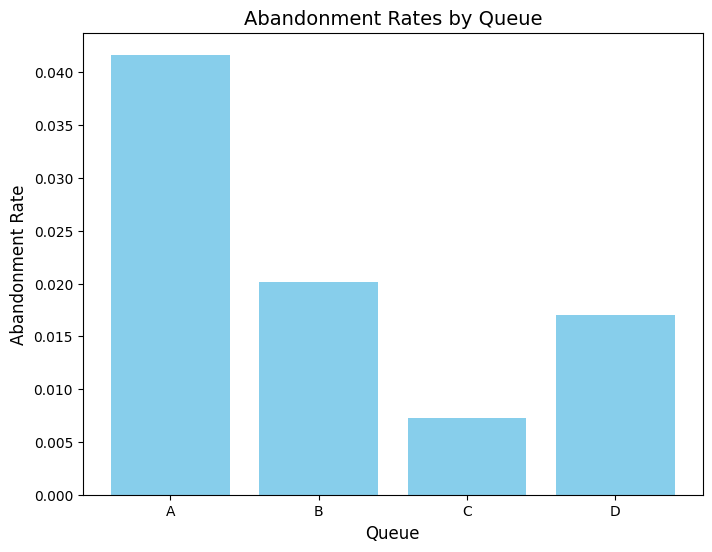

In [51]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
import matplotlib.pyplot as plt

# Data from abandonment_rates dictionary
queues = list(abandonment_rates.keys())
abandonment_values = list(abandonment_rates.values())

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(queues, abandonment_values, color='skyblue')

# Add titles and labels
plt.title('Abandonment Rates by Queue', fontsize=14)
plt.xlabel('Queue', fontsize=12)
plt.ylabel('Abandonment Rate', fontsize=12)

# Show the plot
plt.show()


##### Record your answer below:

> Chart style you chose and why:
>  I used a bar chart. The bar chart helps to visualize the correlation between the average abandonment rate and queue.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

        Total Calls  Quick Calls  Service Level %  Average Speed of Answer
Rep ID                                                                    
Amanda            5            3        60.000000                 2.400000
Andy             10            3        30.000000                 3.600000
Brent             8            6        75.000000                 2.125000
Cam              11            5        45.454545                 2.909091
Duke             14            6        42.857143                 2.785714
Joe              10            2        20.000000                 3.600000
Lilly            12            4        33.333333                 3.083333
Todd              6            2        33.333333                 3.500000
Xander            6            2        33.333333                 3.333333


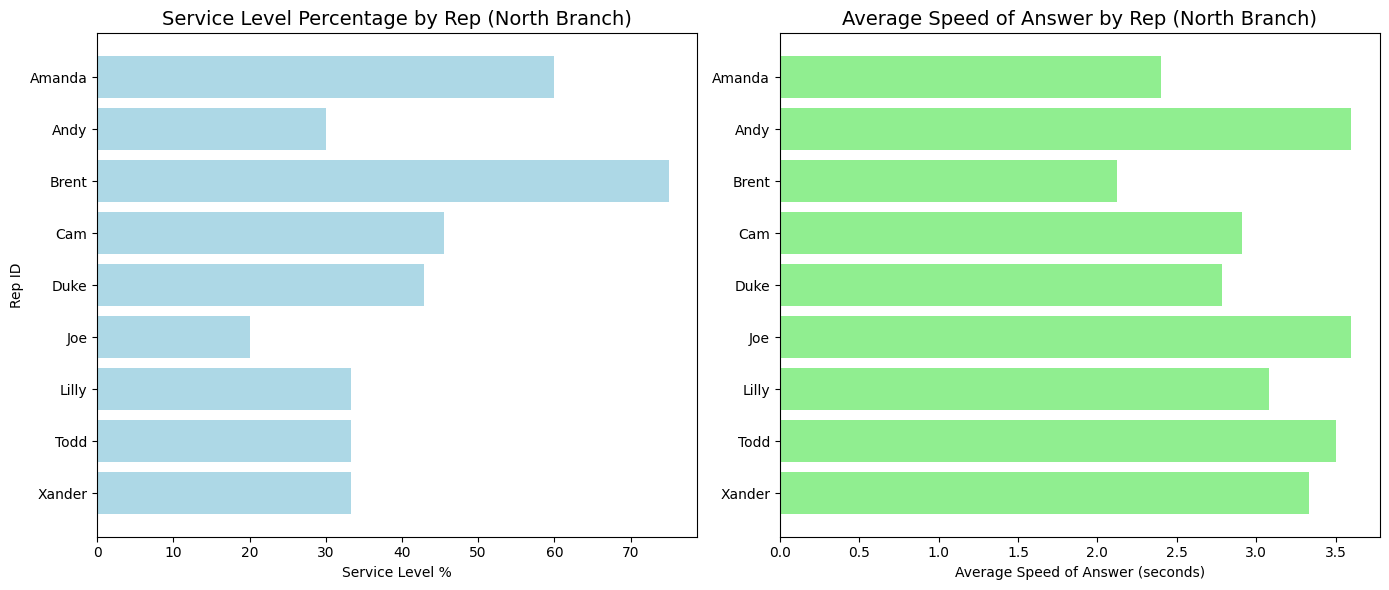

In [56]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

import pandas as pd

# Step 1: Filter incoming calls for the North Branch
north_incoming_calls = North_CallCenter[North_CallCenter["Incoming or Outgoing"] == "Incoming"]

# Step 2: Calculate the service level for each rep (calls answered within 2 seconds)
# Filter quick calls (<= 2 seconds)
north_quick_calls = north_incoming_calls[north_incoming_calls["Incoming Wait Time"] <= 2.0]

# Group by 'Rep ID' and calculate total calls and quick calls
total_calls_per_rep = north_incoming_calls.groupby("Rep ID")["Calls"].sum()
quick_calls_per_rep = north_quick_calls.groupby("Rep ID")["Calls"].sum()

# Create a DataFrame to store the results
service_level_per_rep = pd.DataFrame({
    "Total Calls": total_calls_per_rep,
    "Quick Calls": quick_calls_per_rep
}).fillna(0)  # Filling NaN values with 0 for reps with no quick calls

# Step 3: Calculate the service level percentage
service_level_per_rep["Service Level %"] = (service_level_per_rep["Quick Calls"] / service_level_per_rep["Total Calls"]) * 100

# Step 4: Calculate the average speed of answer (ASA) for each rep
service_level_per_rep["Average Speed of Answer"] = north_incoming_calls.groupby("Rep ID")["Incoming Wait Time"].mean()

# Display the final DataFrame
print(service_level_per_rep)

#Your Code Here:
import matplotlib.pyplot as plt

# Step 5: Visualization of Service Level % and ASA

# Setting up the figure with two subplots (side-by-side)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Service Level Percentage per Rep
ax[0].barh(service_level_per_rep.index, service_level_per_rep["Service Level %"], color='lightblue')
ax[0].set_title('Service Level Percentage by Rep (North Branch)', fontsize=14)
ax[0].set_xlabel('Service Level %')
ax[0].set_ylabel('Rep ID')
ax[0].invert_yaxis()  # Highest value on top

# Plot 2: Average Speed of Answer (ASA) per Rep
ax[1].barh(service_level_per_rep.index, service_level_per_rep["Average Speed of Answer"], color='lightgreen')
ax[1].set_title('Average Speed of Answer by Rep (North Branch)', fontsize=14)
ax[1].set_xlabel('Average Speed of Answer (seconds)')
ax[1].invert_yaxis()  # Ensure both charts have the same y-axis orientation

# Display the plots
plt.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


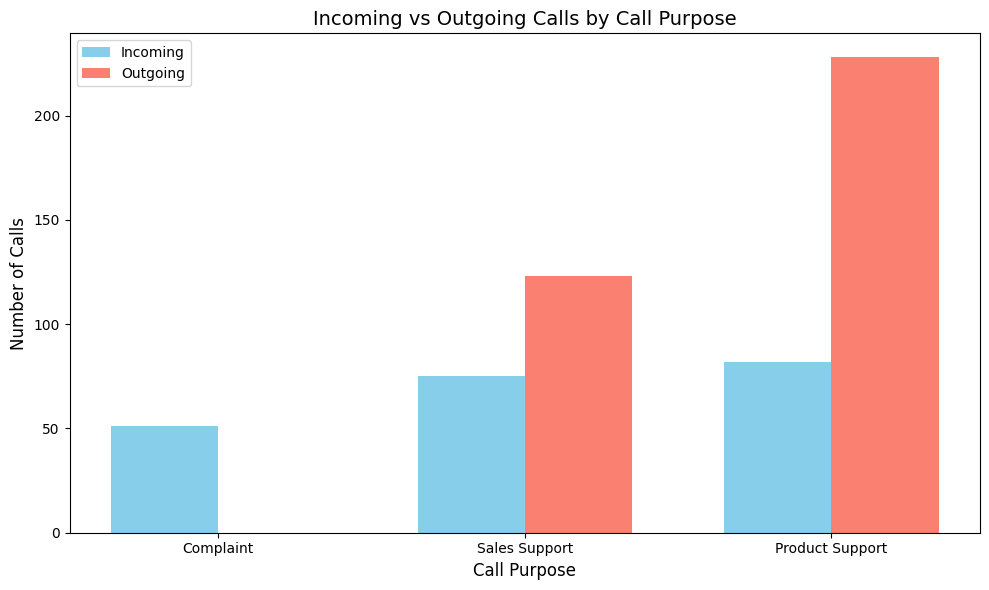

In [58]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
import matplotlib.pyplot as plt
import numpy as np

# Data from the dictionaries
call_purposes = ["Complaint", "Sales Support", "Product Support"]
incoming_calls = [complaints.get('Incoming', 0), sales_support.get('Incoming', 0), product_support.get('Incoming', 0)]
outgoing_calls = [complaints.get('Outgoing', 0), sales_support.get('Outgoing', 0), product_support.get('Outgoing', 0)]

# X-axis positions
x = np.arange(len(call_purposes))

# Width of the bars
bar_width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot incoming and outgoing calls
bars1 = ax.bar(x - bar_width/2, incoming_calls, bar_width, label='Incoming', color='skyblue')
bars2 = ax.bar(x + bar_width/2, outgoing_calls, bar_width, label='Outgoing', color='salmon')

# Add labels and title
ax.set_xlabel('Call Purpose', fontsize=12)
ax.set_ylabel('Number of Calls', fontsize=12)
ax.set_title('Incoming vs Outgoing Calls by Call Purpose', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(call_purposes)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Record your answer below:

> Chart style you chose and why: 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:
> North Branch: Slightly better in service level (more calls answered within 2 seconds), which is an important metric for responsiveness.
>South Branch: Better in call abandonment rate and average speed of answer, meaning fewer customers are dropping off and calls are being answered more quickly on average.

Overall Efficiency:
>South Branch seems to be operating more efficiently based on its lower abandonment rate and slightly faster speed of answer. These two KPIs are crucial for maintaining customer satisfaction and minimizing lost opportunities.

>North Branch performs better in service level, which suggests they may have better responsiveness, but since the difference is small and the South Branch still maintains a competitive service level, the South Branch edges out slightly in overall efficiency.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer:
> North Branch would benefit more from extra help because:

They have fewer reps (9) handling calls compared to the South Branch (11 reps).
Their slightly slower speed of answer indicates that they may be working at full capacity.
They are maintaining a higher service level, but this could drop if the workload increases, or they may struggle with longer call times without additional support.
South Branch, with more reps, seems to be managing its workload well and doesn't appear to need immediate additional resources.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 
>Having detailed information on call volume over time (such as per hour or day) would help assess how each branch handles peak times. This could identify whether additional reps are needed during certain times rather than overall.
> Call outcomes, it would be useful to know whether calls ended in successful resolutions, follow-ups, or complaints. Tracking the effectiveness of reps beyond just answering calls quickly can better inform branch efficiency and rep effectiveness.
> Customer Satisfaction Scores (CSAT) data would provide direct insight into how customers perceive the service they are receiving. High efficiency in terms of KPIs like speed of answer doesn’t always correlate with high satisfaction, so this metric would add another layer of understanding to branch performance.
> These additional data points would provide a fuller picture of both branch efficiency and customer experience, offering more insights for staffing decisions and process improvements.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

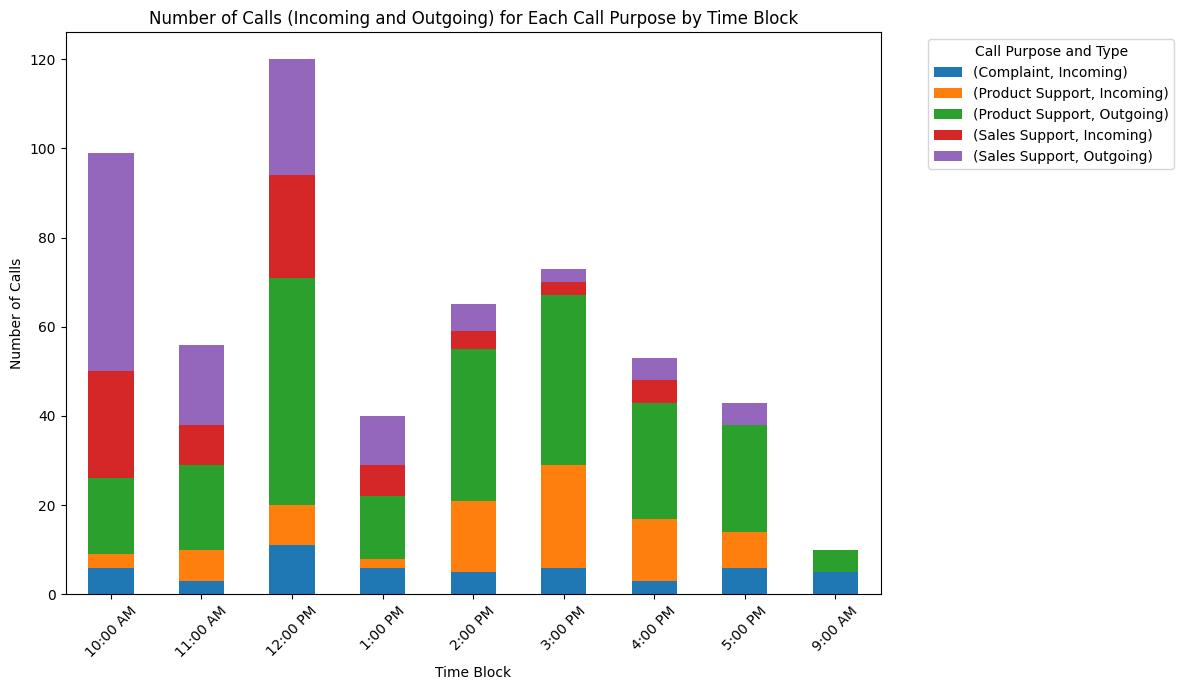

In [61]:
# Create your Bonus Mission visualization here!
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Group by 'Time Block', 'Call Purpose', and 'Incoming or Outgoing', and sum the 'Calls'
grouped_calls = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"]).sum().reset_index()

# Pivot the table to prepare for visualization
pivot_calls = grouped_calls.pivot_table(values='Calls', index=['Time Block'], columns=['Call Purpose', 'Incoming or Outgoing'], aggfunc='sum')

# Plot the stacked bar chart
pivot_calls.plot(kind='bar', stacked=True, figsize=(12, 7))

# Set the title and labels
plt.title('Number of Calls (Incoming and Outgoing) for Each Call Purpose by Time Block')
plt.xlabel('Time Block')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

# Display the legend and plot
plt.legend(title='Call Purpose and Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
